In [2]:
!pip install seaborn

    100% |████████████████████████████████| 215kB 5.4MB/s ta 0:00:01


In [410]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [411]:
cdr=os.getcwd()

In [574]:
use_col=['MovieName','Distributor','Gross','Release','ReleaseInfo',
         'Budget','GoldRelease','IssueDataOfGoldenWeek',
         'Genre','Number','year','Runtime','Country']

In [575]:
data_dict={}
for root, dirs, files in os.walk(cdr):
    for name in files:
        if name[:4]=='data':
            #vars()[name[:-4]]=pd.read_csv(name,usecols=use_col)
            #name=name[1:]
            data_dict[name[:-4]]=pd.read_csv(name,usecols=use_col)
            data_dict[name[:-4]]=data_dict[name[:-4]][1:]
            #print(name)

In [576]:
data_dict.keys()

dict_keys(['data_2018', 'data_2015', 'data_2017', 'data_2016'])

merging data into one table

In [577]:
data=pd.DataFrame()
for df in data_dict.keys():data=data.append(data_dict[df],sort=True,ignore_index=True) 

In [578]:
amount=0
for df in data_dict.keys():amount=amount+data_dict[df].shape[0]

In [579]:
amount==data.shape[0]  # checking wether we lose any data

True

In [580]:
data.head()

,Budget,Country,Distributor,Genre,GoldRelease,Gross,IssueDataOfGoldenWeek,MovieName,Number,Release,ReleaseInfo,Runtime,year
0,"$70,000,000\n",China,NaN,Drama,0,"$575,849,199",1,Operation Red Sea,12.0,16-Feb,11.0,142,2018.0
1,"$70,000,000\n",China,NaN,Thriller,0,"$575,849,199",1,Operation Red Sea,24.0,16-Feb,11.0,142,2018.0
2,"$70,000,000\n",China,NaN,War,0,"$575,849,199",1,Operation Red Sea,26.0,16-Feb,11.0,142,2018.0
3,NaN,China,NaN,Action,0,"$541,406,438",1,Detective Chinatown 2,1.0,16-Feb,9.0,121,2015.0
4,NaN,China,NaN,Comedy,0,"$541,406,438",1,Detective Chinatown 2,6.0,16-Feb,9.0,121,2015.0


### data cleaning and parsering
- 0. how many N/A data
- 1. deal with N/A
- 2. year and release date parse into time style
- 3. budget, gross, ReleaseInfo to integer

In [581]:
data.isna().sum()
#1. drop any rows where budget=nan drop any rows Genre=0
#2. drop the column distributor
#4. match the rows where Number=0
#5. match the rows where ReleaseInfo=0
#6. match the rows where year=0

Budget                   352
Country                   58
Distributor              601
Genre                     39
GoldRelease                0
Gross                      0
IssueDataOfGoldenWeek      0
MovieName                  0
Number                    45
Release                    0
ReleaseInfo               21
Runtime                   73
year                       5
dtype: int64

In [582]:
data.Runtime=data.Runtime.fillna(method='bfill')

In [583]:
data=data.dropna(subset=['Genre','Budget'])
data=data.drop(axis=1,labels='Distributor')

In [584]:
data[pd.isnull(data).any(axis=1)]

,Budget,Country,Genre,GoldRelease,Gross,IssueDataOfGoldenWeek,MovieName,Number,Release,ReleaseInfo,Runtime,year
40,"$120,000,000",NaN,Action,0,"$156,381,897",2,Rampage (2018),1.0,13-Apr,9.0,113,2018.0
41,"$120,000,000",NaN,Adventure,0,"$156,381,897",2,Rampage (2018),2.0,13-Apr,9.0,113,2018.0
42,"$120,000,000",NaN,Sci-Fi,0,"$156,381,897",2,Rampage (2018),21.0,13-Apr,9.0,113,2018.0
52,"$15,000,000",NaN,Drama,0,"$119,035,157",1,Forever Young (2018),12.0,12-Jan,10.0,138,2018.0
70,"42,857,143",NaN,Action,0,"$90,524,286",4,Shadow (2018),1.0,30-Sep,8.0,132,2018.0
71,"CNY 300,000,000",NaN,Drama,0,"$90,524,286",4,Shadow (2018),12.0,30-Sep,8.0,132,2018.0
72,"CNY 300,000,000",NaN,History,0,"$90,524,286",4,Shadow (2018),15.0,30-Sep,8.0,132,2018.0
442,"$20,000,000\n",China,Drama,0,"$20,660,000",4,Lady of the Dynasty,12.0,30-Jul,NaN,122,2015.0
443,"$20,000,000\n",China,History,0,"$20,660,000",4,Lady of the Dynasty,15.0,30-Jul,NaN,122,2015.0
444,"$20,000,000\n",China,Romance,0,"$20,660,000",4,Lady of the Dynasty,20.0,30-Jul,NaN,122,2015.0


In [585]:
data.loc[[442,443,444],'ReleaseInfo']=2
data.loc[602,'ReleaseInfo']=9

In [586]:
data.loc[905,'Number']=18

In [587]:
data.loc[863,'Number']=4
data.loc[872,'Number']=26

In [588]:
data.isna().sum()
##now we finish the cleaning

Budget                   0
Country                  9
Genre                    0
GoldRelease              0
Gross                    0
IssueDataOfGoldenWeek    0
MovieName                0
Number                   0
Release                  0
ReleaseInfo              0
Runtime                  0
year                     0
dtype: int64

- 3.parser time type data into time for further time-series analysis
- 4.parser budget, gross, Runtime into integer

In [589]:
data=data.reset_index().iloc[:,1:]

In [590]:
a=data.Budget.replace(regex=r'^\$', value='')
a=a.replace(regex=r'\n',value='')
a=a.replace(regex=[r'\s',r'\n',r',',r'^\$'],value='')

In [591]:
a=data.Budget.replace(regex=[r'\s',r'\n',r',',r'^\$'],value='')

In [592]:
for i in range(len(a)):
    if bool(re.match('^[0-9]',a[i]))==False:
        money=a[i]
        if 'CNY' in money :a[i]= str(int(re.findall(r'[0-9]+$',money)[0])*0.15)
        if 'euro' in money:a[i]=str((int(re.findall(r'[0-9]+$',money)[0])*1.13))
        if 'HKD' in money:a[i]=str(int(re.findall(r'[0-9]+$',money)[0])*0.127)
        if 'THB' in money:a[i]=str(int(re.findall(r'[0-9]+$',money)[0])*0.03)
        if 'INR' in money:a[i]=str(int(re.findall(r'[0-9]+$',money)[0])*0.013)
        if 'pound' in money:a[i]=str(int(re.findall(r'[0-9]+$',money)[0])*1.29)
        if '√õ' in money:a[i]=str(int(re.findall(r'[0-9]+$',money)[0]))
        else: pass   
        

In [593]:
data.Budget=a

In [594]:
data.head()

,Budget,Country,Genre,GoldRelease,Gross,IssueDataOfGoldenWeek,MovieName,Number,Release,ReleaseInfo,Runtime,year
0,70000000,China,Drama,0,"$575,849,199",1,Operation Red Sea,12.0,16-Feb,11.0,142,2018.0
1,70000000,China,Thriller,0,"$575,849,199",1,Operation Red Sea,24.0,16-Feb,11.0,142,2018.0
2,70000000,China,War,0,"$575,849,199",1,Operation Red Sea,26.0,16-Feb,11.0,142,2018.0
3,15000000,China,Comedy,0,"$451,176,639",4,Dying To Survive,6.0,5-Jul,14.0,117,2018.0
4,15000000,China,Drama,0,"$451,176,639",4,Dying To Survive,12.0,5-Jul,14.0,117,2018.0


In [595]:
gross=data.Gross.replace(regex=[r'\s',r'\n',r',',r'^\$',r'^√õ'],value='')

In [596]:
data.Gross=gross

In [597]:
data.head()
#budget and gross data prepared

,Budget,Country,Genre,GoldRelease,Gross,IssueDataOfGoldenWeek,MovieName,Number,Release,ReleaseInfo,Runtime,year
0,70000000,China,Drama,0,575849199,1,Operation Red Sea,12.0,16-Feb,11.0,142,2018.0
1,70000000,China,Thriller,0,575849199,1,Operation Red Sea,24.0,16-Feb,11.0,142,2018.0
2,70000000,China,War,0,575849199,1,Operation Red Sea,26.0,16-Feb,11.0,142,2018.0
3,15000000,China,Comedy,0,451176639,4,Dying To Survive,6.0,5-Jul,14.0,117,2018.0
4,15000000,China,Drama,0,451176639,4,Dying To Survive,12.0,5-Jul,14.0,117,2018.0


In [598]:
#prepare the release time
data['Releasedate']=data.Release+'-'+data.year.astype(int).astype(str)

In [599]:
data.Releasedate=pd.to_datetime(data.Releasedate,format='%d-%b-%Y')

In [600]:
data.head()

,Budget,Country,Genre,GoldRelease,Gross,IssueDataOfGoldenWeek,MovieName,Number,Release,ReleaseInfo,Runtime,year,Releasedate
0,70000000,China,Drama,0,575849199,1,Operation Red Sea,12.0,16-Feb,11.0,142,2018.0,2018-02-16
1,70000000,China,Thriller,0,575849199,1,Operation Red Sea,24.0,16-Feb,11.0,142,2018.0,2018-02-16
2,70000000,China,War,0,575849199,1,Operation Red Sea,26.0,16-Feb,11.0,142,2018.0,2018-02-16
3,15000000,China,Comedy,0,451176639,4,Dying To Survive,6.0,5-Jul,14.0,117,2018.0,2018-07-05
4,15000000,China,Drama,0,451176639,4,Dying To Survive,12.0,5-Jul,14.0,117,2018.0,2018-07-05


In [601]:
data[['Budget','Gross']]=data[['Budget','Gross']].astype(float).astype(int)

In [602]:
print(data[['Budget','Gross','Releasedate']].max(),'\n\n',data[['Budget','Gross','Releasedate']].min())

Budget                   321000000
Gross                    854248869
Releasedate    2018-12-31 00:00:00
dtype: object 

 Budget                        1290
Gross                      8713376
Releasedate    1995-04-07 00:00:00
dtype: object


In [603]:
#here there is a outlier of Releasedate need to drop it

In [604]:
data=data[data.Releasedate>'2013-01-01']

In [605]:
print(data[['Budget','Gross','Releasedate']].max(),'\n\n',data[['Budget','Gross','Releasedate']].min())

Budget                   321000000
Gross                    854248869
Releasedate    2018-12-31 00:00:00
dtype: object 

 Budget                        1290
Gross                      8713376
Releasedate    2014-01-04 00:00:00
dtype: object


In [606]:
data.loc[data.Gross==data.Gross.max(),:]

,Budget,Country,Genre,GoldRelease,Gross,IssueDataOfGoldenWeek,MovieName,Number,Release,ReleaseInfo,Runtime,year,Releasedate
303,29700000,China,Drama,0,854248869,4,Wolf Warrior 2,12.0,27-Jul,14.0,123,2017.0,2017-07-27
304,29700000,China,Thriller,0,854248869,4,Wolf Warrior 2,24.0,27-Jul,14.0,123,2017.0,2017-07-27
305,29700000,China,War,0,854248869,4,Wolf Warrior 2,25.0,27-Jul,14.0,123,2017.0,2017-07-27


In [607]:
data.loc[[303,304,305],'Gross']=2721100

In [608]:
data.loc[data.Gross==data.Gross.max(),:]

,Budget,Country,Genre,GoldRelease,Gross,IssueDataOfGoldenWeek,MovieName,Number,Release,ReleaseInfo,Runtime,year,Releasedate
0,70000000,China,Drama,0,575849199,1,Operation Red Sea,12.0,16-Feb,11.0,142,2018.0,2018-02-16
1,70000000,China,Thriller,0,575849199,1,Operation Red Sea,24.0,16-Feb,11.0,142,2018.0,2018-02-16
2,70000000,China,War,0,575849199,1,Operation Red Sea,26.0,16-Feb,11.0,142,2018.0,2018-02-16


In [609]:
data.dtypes

Budget                            int64
Country                          object
Genre                            object
GoldRelease                       int64
Gross                             int64
IssueDataOfGoldenWeek             int64
MovieName                        object
Number                          float64
Release                          object
ReleaseInfo                     float64
Runtime                          object
year                            float64
Releasedate              datetime64[ns]
dtype: object

- change Genre to str
- change Number to str
- change GoldRelease to str
- change IssueDataOfGoldenWeek to str
- change movie Name to str
- change ReleaseInfo to int
- change Runtime to int

In [610]:
data[['Genre','Number','GoldRelease','IssueDataOfGoldenWeek','MovieName']]=data[['Genre','Number','GoldRelease','IssueDataOfGoldenWeek','MovieName']].astype(str)

In [611]:
data.dtypes

Budget                            int64
Country                          object
Genre                            object
GoldRelease                      object
Gross                             int64
IssueDataOfGoldenWeek            object
MovieName                        object
Number                           object
Release                          object
ReleaseInfo                     float64
Runtime                          object
year                            float64
Releasedate              datetime64[ns]
dtype: object

In [612]:
Runtime=data.Runtime
data.Runtime=pd.to_numeric(Runtime,errors='corece')


In [613]:
data.dtypes

Budget                            int64
Country                          object
Genre                            object
GoldRelease                      object
Gross                             int64
IssueDataOfGoldenWeek            object
MovieName                        object
Number                           object
Release                          object
ReleaseInfo                     float64
Runtime                         float64
year                            float64
Releasedate              datetime64[ns]
dtype: object

In [614]:
data.Runtime=data.Runtime.fillna(method='ffill')

In [615]:
data.isnull().sum()

Budget                   0
Country                  9
Genre                    0
GoldRelease              0
Gross                    0
IssueDataOfGoldenWeek    0
MovieName                0
Number                   0
Release                  0
ReleaseInfo              0
Runtime                  0
year                     0
Releasedate              0
dtype: int64

**processing country**

In [621]:
data.Country.value_counts()

USA          338
China        118
UK            75
France        22
Hong          12
Japan         11
India          9
South          5
Poland         5
Germany        4
Australia      4
Taiwan         3
New            2
Spain          1
Thailand       1
Name: Country, dtype: int64

In [625]:
data[data.Country.isnull()==True]

,Budget,Country,Genre,GoldRelease,Gross,IssueDataOfGoldenWeek,MovieName,Number,Release,ReleaseInfo,Runtime,year,Releasedate


In [624]:
data.loc[[25,26,27,470,553],'Country']='USA'
data.loc[[36,52,53,54],'Country']='China'

### EDA (Exploratory Data Analysis)
Now we want to do some DATA EXPLORATION ANALYSIS
- 1.time series analysis and distribution analysis (Gross)
- 2.main feature distribution and box plot
- 3.histogram of gross
- 4.covariance analysis between features (catagorical variables)


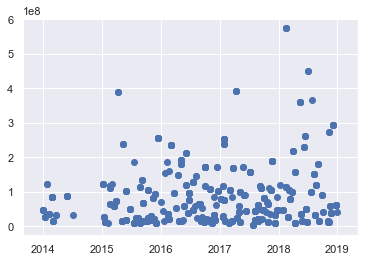

In [626]:
plt.scatter(data.Releasedate,data.Gross)
#there is no obviously time series

In [627]:
data.columns

Index(['Budget', 'Country', 'Genre', 'GoldRelease', 'Gross',
       'IssueDataOfGoldenWeek', 'MovieName', 'Number', 'Release',
       'ReleaseInfo', 'Runtime', 'year', 'Releasedate'],
      dtype='object')

In [628]:
data.head()

,Budget,Country,Genre,GoldRelease,Gross,IssueDataOfGoldenWeek,MovieName,Number,Release,ReleaseInfo,Runtime,year,Releasedate
0,70000000,China,Drama,0,575849199,1,Operation Red Sea,12.0,16-Feb,11.0,142.0,2018.0,2018-02-16
1,70000000,China,Thriller,0,575849199,1,Operation Red Sea,24.0,16-Feb,11.0,142.0,2018.0,2018-02-16
2,70000000,China,War,0,575849199,1,Operation Red Sea,26.0,16-Feb,11.0,142.0,2018.0,2018-02-16
3,15000000,China,Comedy,0,451176639,4,Dying To Survive,6.0,5-Jul,14.0,117.0,2018.0,2018-07-05
4,15000000,China,Drama,0,451176639,4,Dying To Survive,12.0,5-Jul,14.0,117.0,2018.0,2018-07-05


In [629]:
data['log_gross']=np.log(data.Gross)
data['log_budget']=np.log(data.Budget)

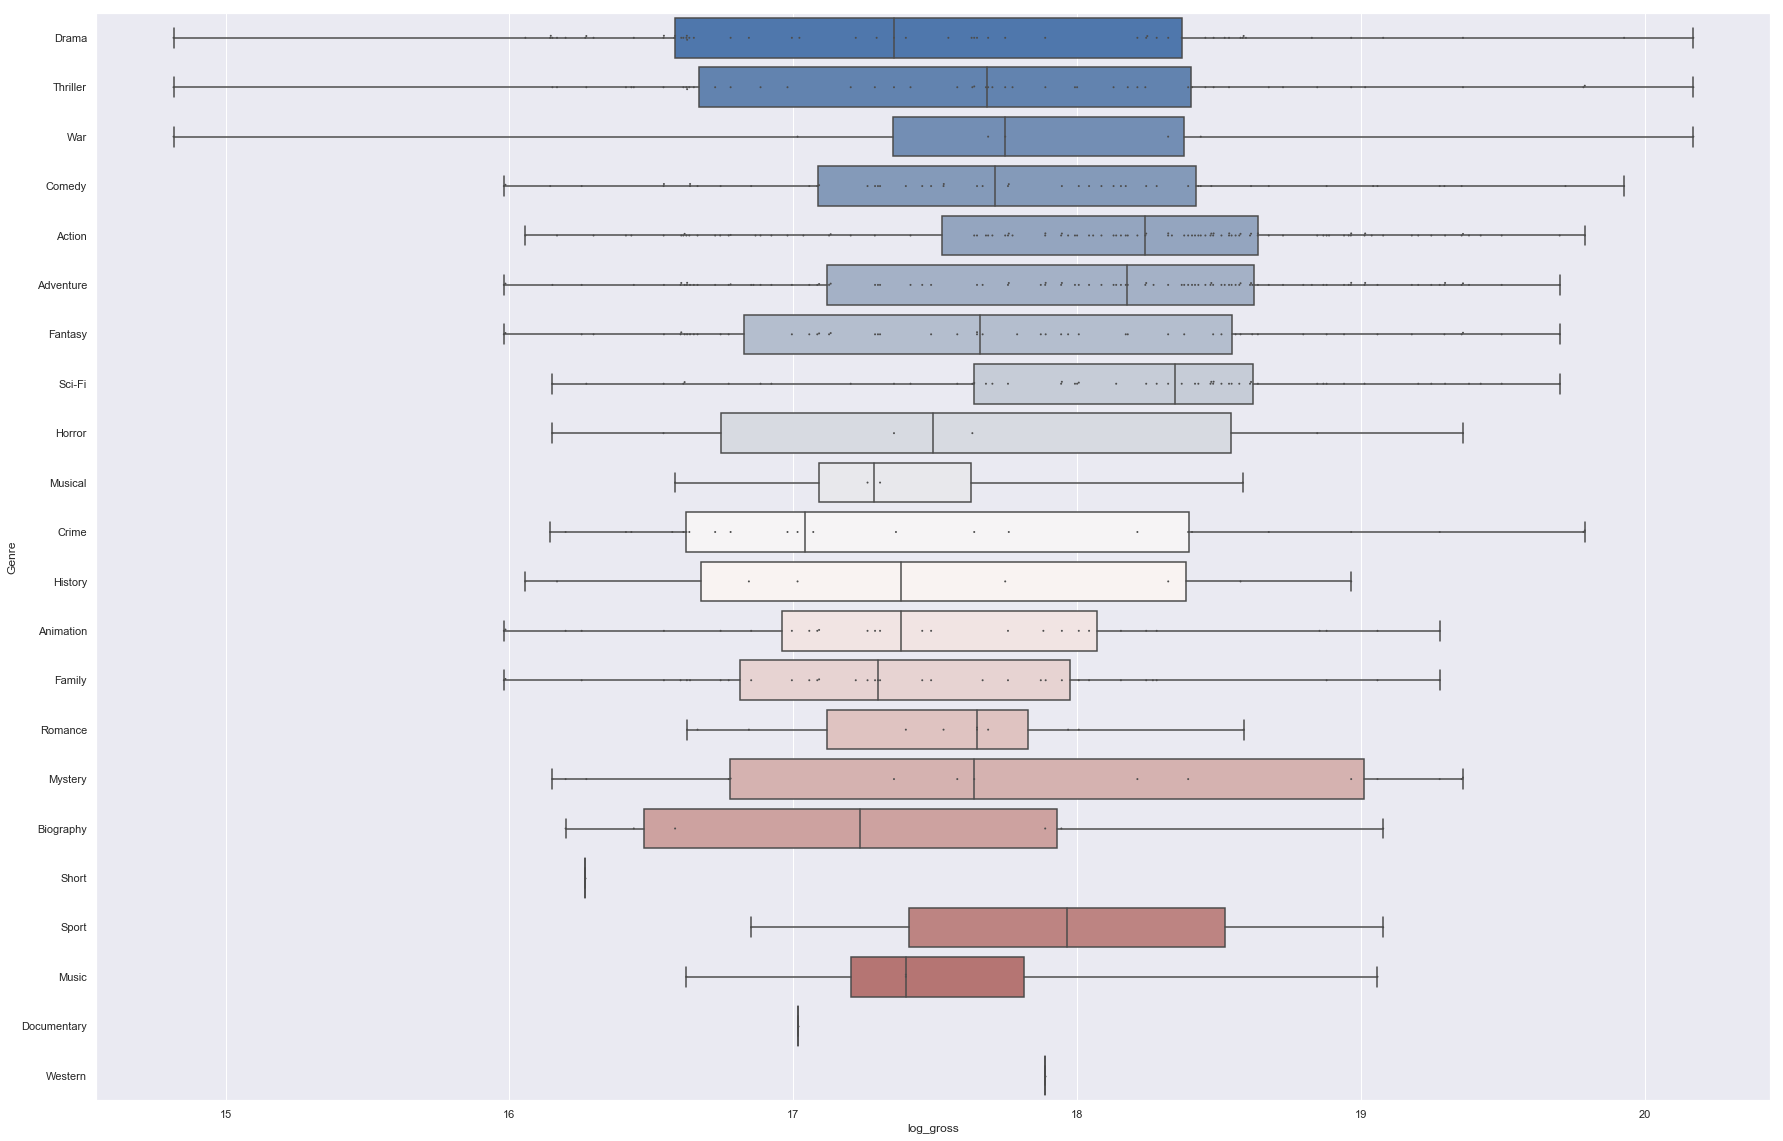

In [630]:
f,ax=plt.subplots(figsize=(30, 20))
sns.boxplot(x='log_gross',y='Genre',whis="range",data=data,palette='vlag')
sns.swarmplot(x="log_gross", y="Genre", data=data,
              size=2, color=".3", linewidth=0)

In [631]:
bound=np.percentile(data.Gross,[10,20,30,40,50,60,70,80,90,100])


2.main features distributions

In [632]:
one_hot_room = pd.get_dummies(data[['Number','GoldRelease','IssueDataOfGoldenWeek','Country']])

In [633]:
one_hot_room

,Number_1.0,Number_11.0,Number_12.0,Number_13.0,Number_14.0,Number_15.0,Number_16.0,Number_18.0,Number_19.0,Number_2.0,...,Country_India,Country_Japan,Country_New,Country_Poland,Country_South,Country_Spain,Country_Taiwan,Country_Thailand,Country_UK,Country_USA
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [634]:
def plot_corr(df):
    f, ax = plt.subplots(figsize=(20,16))
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    return sns.heatmap(corr, mask=mask,
cmap=sns.palplot(sns.cubehelix_palette(8)),square=True,ax=ax)

In [635]:
data_dummies=pd.DataFrame()

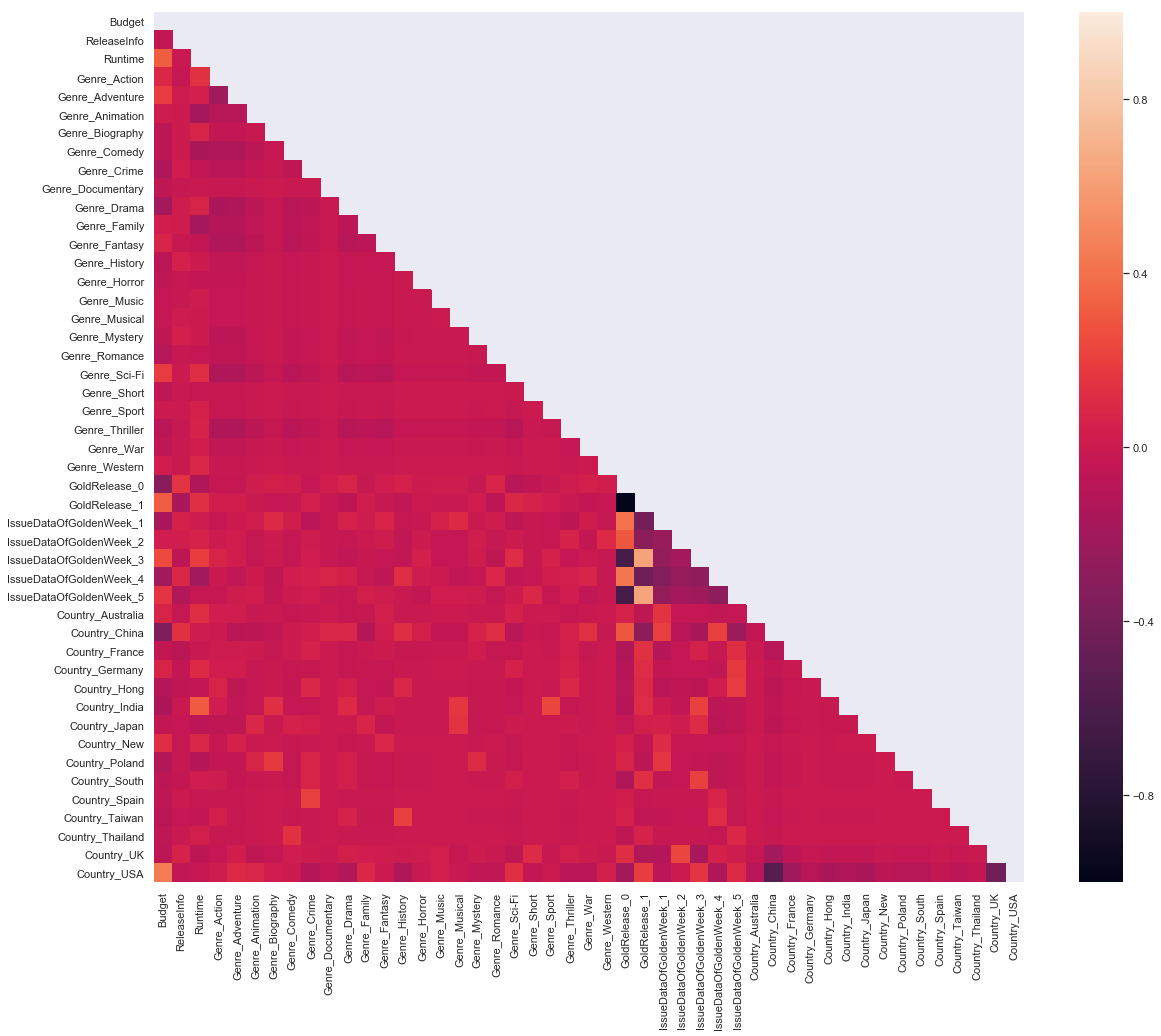

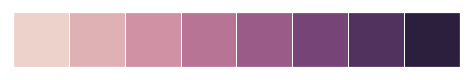

In [638]:
one_hot_room=pd.get_dummies(data[['Genre','GoldRelease','IssueDataOfGoldenWeek','Country']])
#one_hot_room
data_dummies=pd.merge(data[['Budget','ReleaseInfo','Runtime']],one_hot_room,on=data.index)
#data
# correlation matrix for general features
plot_corr(data_dummies.iloc[:,1:])
#data_dummies.iloc[:,1:].head()

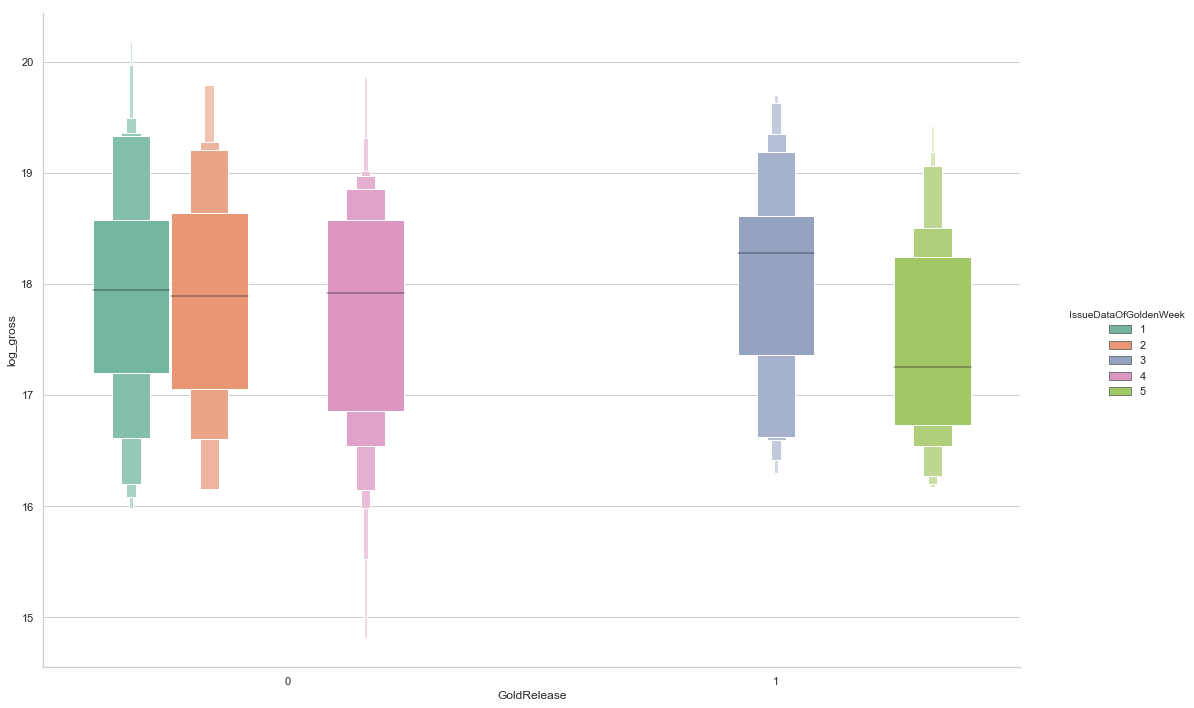

In [759]:
#f,ax=plt.subplots(figsize=(20,20))
#sns.boxplot(x='GoldRelease',y='Gross',hue='IssueDataOfGoldenWeek',data=data,palette='vlag',)
sns.set(style="whitegrid")
sns.catplot(x="GoldRelease", y="log_gross",
                 hue="IssueDataOfGoldenWeek", 
                 data=data, kind="boxen",
                 height=10, aspect=1.5,palette='Set2',margin_titles=True);


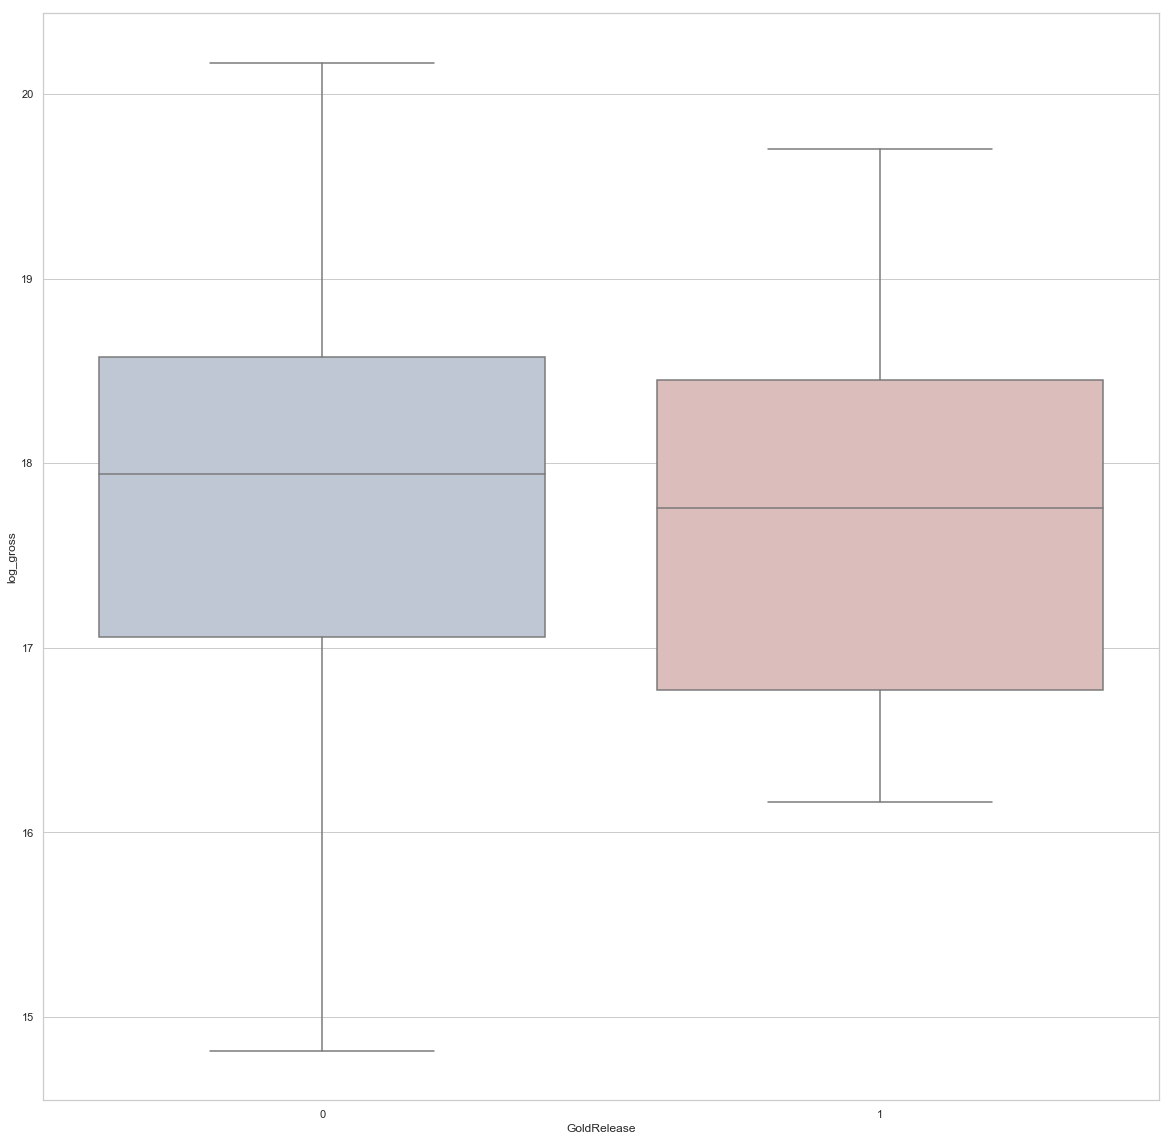

In [760]:
f,axx=plt.subplots(figsize=(20,20))
sns.boxplot(x='GoldRelease',y='log_gross',data=data,palette='vlag')

#### budget and gross

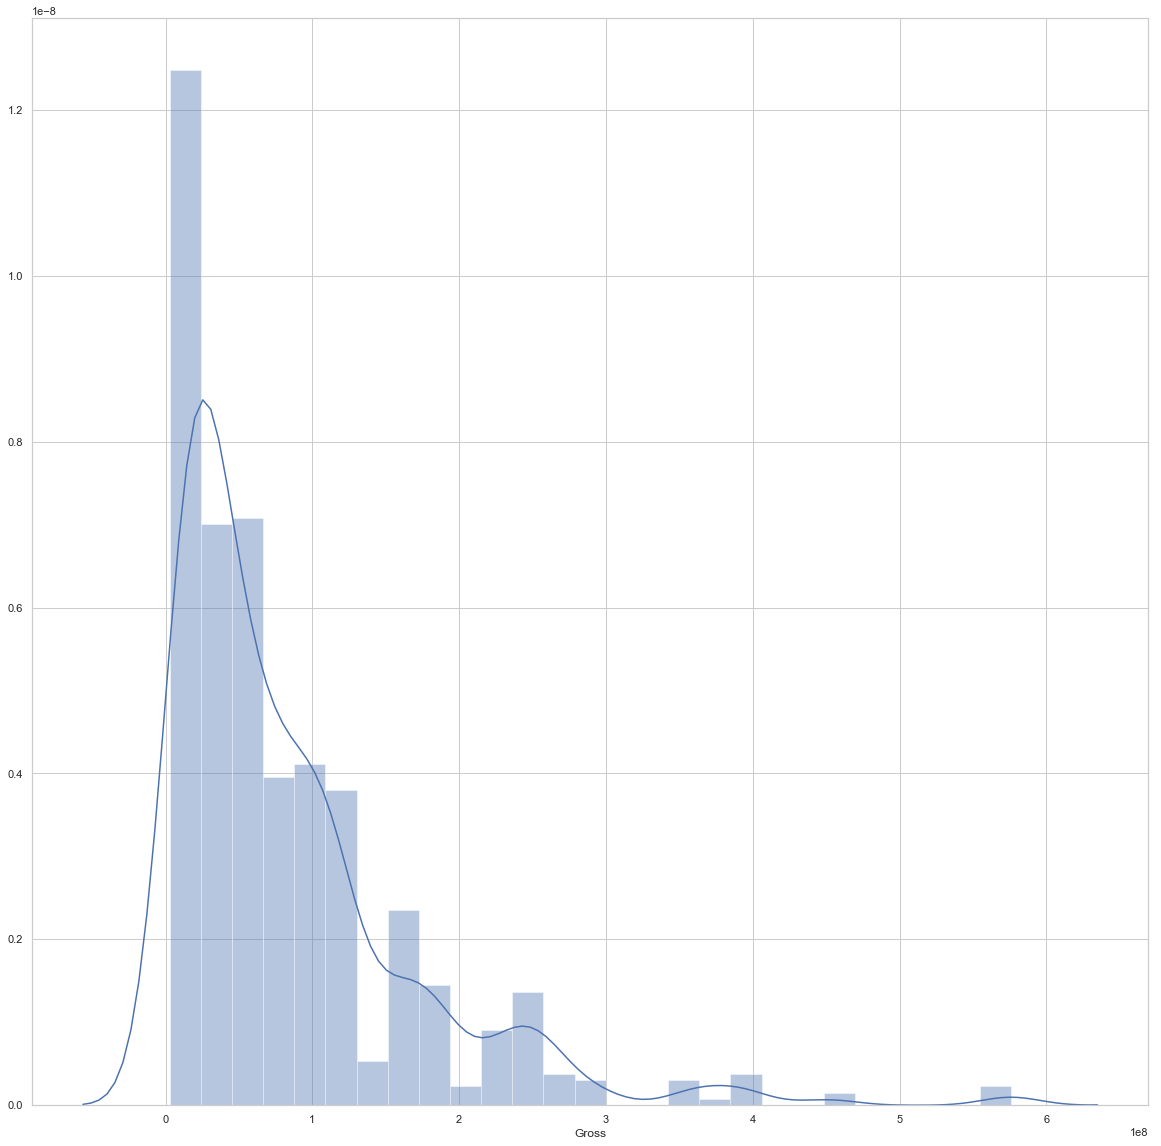

In [761]:
f,ax=plt.subplots(figsize=(20,20))
sns.distplot(data.Gross,)

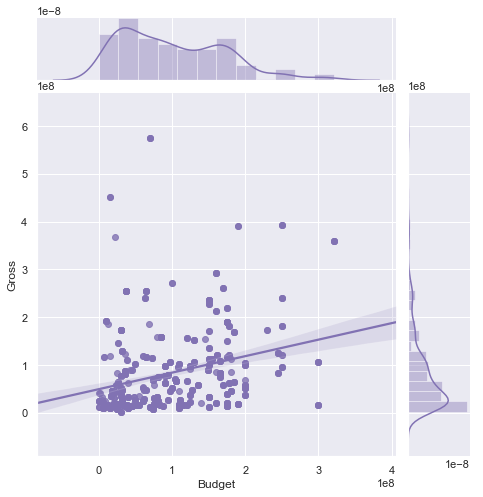

In [762]:
sns.set(style="darkgrid")
g = sns.jointplot("Budget", "Gross", data=data, kind="reg",
                   color="m", height=7)

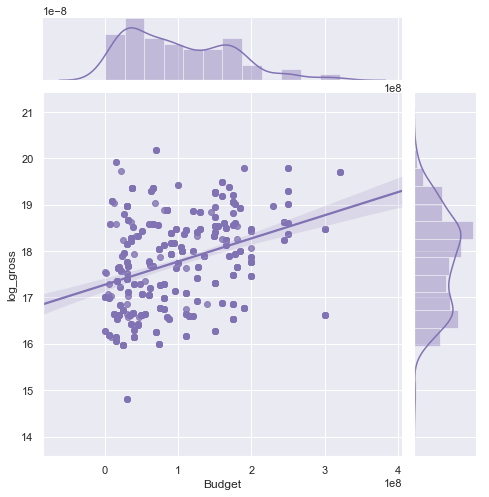

In [763]:
sns.set(style="darkgrid")
g = sns.jointplot('Budget','log_gross', data=data, kind="reg",
                   color="m", height=7)


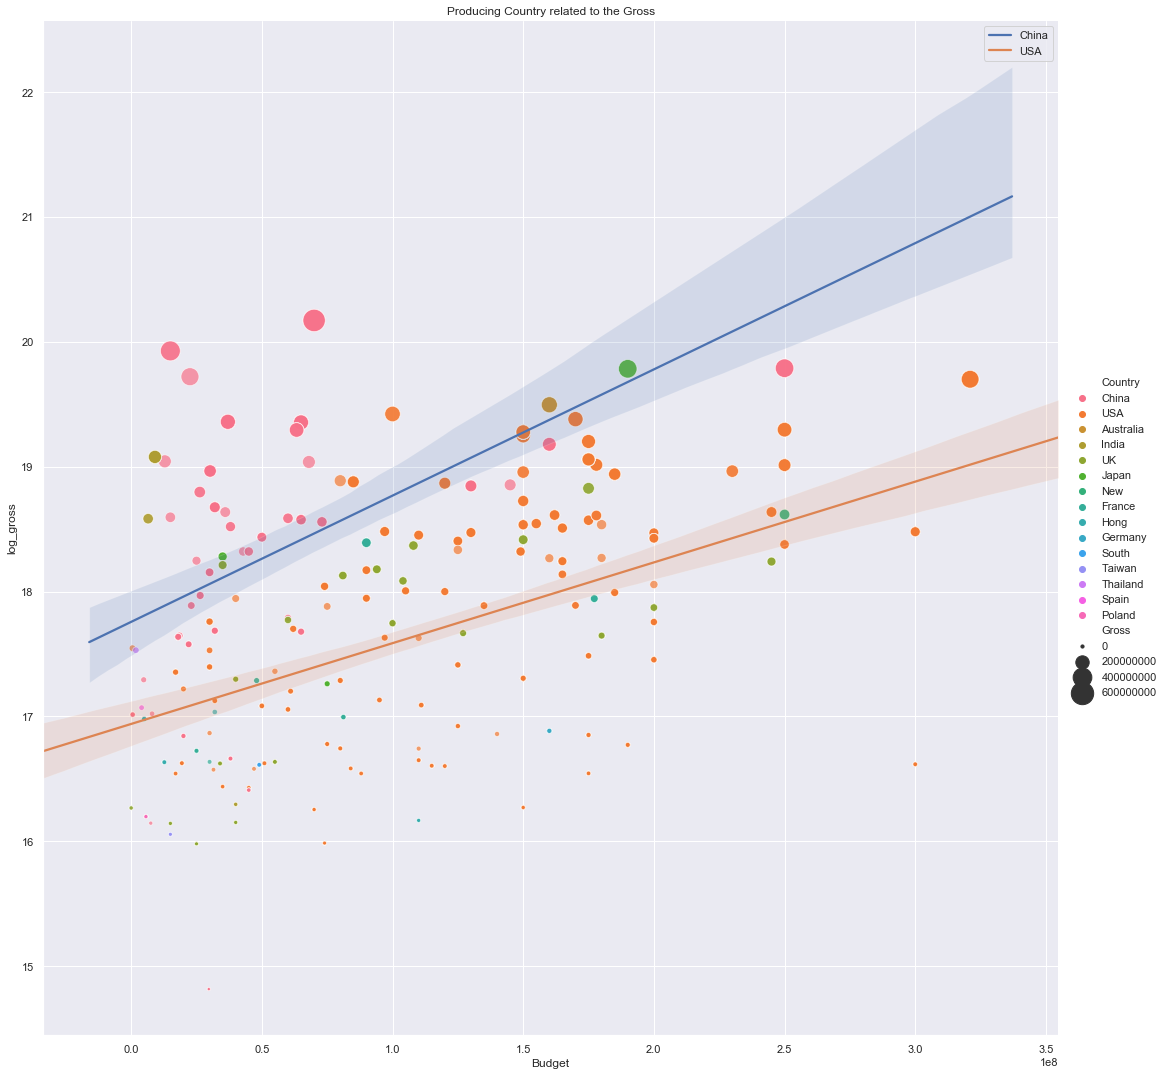

In [786]:
#f, ax=plt.subplots(figsize=(10,10))
sns.relplot(x="Budget", y="log_gross", hue='Country', size='Gross', 
                style=None, data=data, alpha=0.7,
                col_wrap=None, row_order=None, col_order=None, hue_order=None, hue_norm=None, 
                sizes=(10,500), size_order=None, size_norm=None, markers=None, dashes=None, 
                style_order=None, legend='brief', kind='scatter', height=15, 
                aspect=1, facet_kws=None)
plt.title('Producing Country related to the Gross',)
sns.regplot(x='Budget',y='log_gross',data=data[data['Country']=='China'],label='China',scatter=False)
sns.regplot(x='Budget',y='log_gross',data=data[data['Country']=='USA'],label='USA',scatter=False)
plt.legend(labels=['China','USA'])

data preprocessing for modeling

In [643]:
from sklearn import preprocessing

In [644]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
tran_gross=pt.fit(np.array(data.Gross).reshape((-1,1)))
#tran_gross=pt.transform(tran_gorss)
tran_gross=tran_gross.transform(np.array(data.Gross).reshape((-1,1)))


In [645]:
data['tran_gross']=tran_gross

Text(0.5, 1.0, 'box-cox transformation')

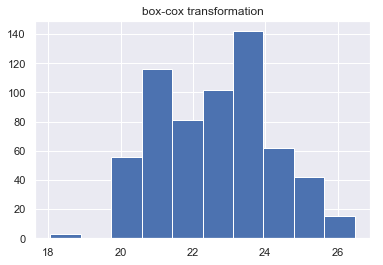

In [835]:
plt.hist(tran_gross)
plt.title('box-cox transformation')

Text(0.5, 1.0, 'log-skew-normal transformation')

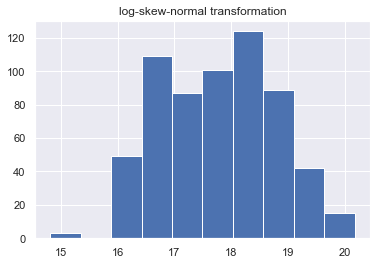

In [836]:
plt.hist(data.log_gross)
plt.title('log-skew-normal transformation')

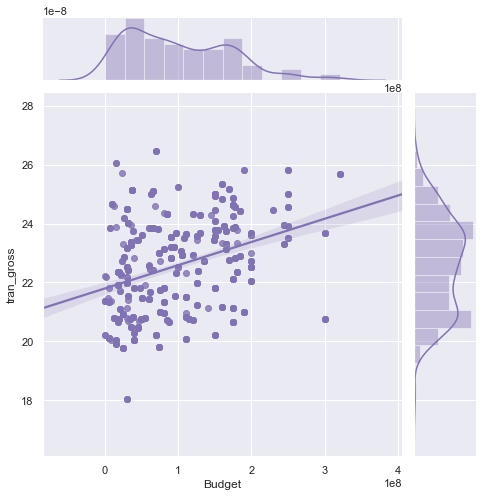

In [648]:
sns.set(style="darkgrid")
g = sns.jointplot('Budget','tran_gross', data=data, kind="reg",
                   color="m", height=7)

### modeling
- GoldRelease is a interesting features
- Genre has no significant covariance, but the data point is unbalanced
- it's better to put log_gross into analyze and Budget has a positive impact of log_gross

#### validation
- 10 fold out
- 75% traning 25% testing

In [840]:
import sklearn
from sklearn.linear_model import LinearRegression

In [841]:
data_fit=pd.merge(data[['log_gross','Budget','ReleaseInfo','Runtime']],one_hot_room,on=data.index)
#data
data_fit=data_fit.drop(labels='key_0',axis=1)

In [842]:

indexes=sklearn.model_selection.train_test_split(data_fit.index,train_size=0.75)
train=data_fit.loc[indexes[0],:]
test=data_fit.loc[indexes[1],:]


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [843]:
print(test.shape,train.shape)

(155, 48) (464, 48)


### model method
#### regression
- OLS
- lasso Regression

In [844]:
X=train.drop(labels=['log_gross','GoldRelease_0','GoldRelease_1'],axis=1)
y=train.log_gross

In [845]:
X_test=test.drop(labels=['log_gross','GoldRelease_0','GoldRelease_1'],axis=1)
y_test=test.log_gross

In [846]:
reg=LinearRegression().fit(X,y)

In [847]:
pred=reg.predict(X)
R_2=reg.score(X,y)
mse=np.mean((pred-y)**2)
print('score:',R_2,'\nMSE:',mse)

score: 0.45246764798303496 
MSE: 0.5631807735200034


Lasso

In [848]:
from sklearn import linear_model

In [849]:
reg_lasso=linear_model.LassoCV(alphas=[0.01,0.1,0.2,0.5,1],
                              fit_intercept=False, cv=5)

In [853]:
reg_lasso.fit(X,y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

LassoCV(alphas=[0.01, 0.1, 0.2, 0.5, 1], copy_X=True, cv=5, eps=0.001,
    fit_intercept=False, max_iter=1000, n_alphas=100, n_jobs=None,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [854]:
pred=reg_lasso.predict(X)
R_2=reg_lasso.score(X,y)
mse=np.mean((pred-y)**2)

In [855]:
print('score:',R_2,'\nMSE:',mse)

score: 0.27873754726750033 
MSE: 0.7418760636599572




#### classification 
- logistics regression
- CART
- xgboost
- neural network (if time allow)
- SVM

**classify the gross 4 folds**

In [865]:
gross_class =pd.qcut(data.log_gross,
                     q=[0,0.25,0.5,0.75,1],
                    labels=[1,2,3,4],
                    retbins=True)
data_fit['gross_class']=gross_class[0]
data_fit=data_fit.dropna(axis=0)
data_fit.index=range(len(data_fit.index))
indexes=sklearn.model_selection.train_test_split(data_fit.index,train_size=0.75)
train=data_fit.loc[indexes[0],:]
test=data_fit.loc[indexes[1],:]
X=train.drop(labels=['log_gross','GoldRelease_0','GoldRelease_1','gross_class'],axis=1)
X_test=test.drop(labels=['log_gross','GoldRelease_0','GoldRelease_1','gross_class'],axis=1)
y=train.gross_class
y_test=test.gross_class

In [866]:
y.dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=True)

#### Logistics regression

In [867]:
lreg=sklearn.linear_model.LogisticRegression(penalty='l2',
                                             tol=0.0001,
                                             C=1.0, 
                                             fit_intercept=False, 
                                             intercept_scaling=1, 
                                             class_weight=None, 
                                             random_state=None, 
                                             solver='lbfgs', 
                                             max_iter=100, 
                                             multi_class='multinomial',
                                             verbose=0,
                                             warm_start=False, 
                                             n_jobs=None)

In [868]:
lreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [869]:
pred=lreg.predict(X)
prob=lreg.predict_proba(X)

In [870]:
lreg.score(X,y)

0.25877192982456143

**Testing Models**

In [668]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
h = .02  # step size in the mesh

names = ["Nearest Neighbors", 
         #"Linear SVM", 
         "RBF SVM", 
         #"Gaussian Process",
         "Decision Tree", 
         "Random Forest", 
         #"Neural Net",
         "AdaBoost",
         "Naive Bayes", 
         #"QDA"
        ]

classifiers = [
    KNeighborsClassifier(3),
    #SVC(kernel="linear", max_iter=1000),
    SVC(gamma=2, C=1,max_iter=1000),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=5),
    #MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    #QuadraticDiscriminantAnalysis()
]

for name, clf in zip(names, classifiers):
        #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X, y)
        bias=clf.score(X,y)
        print(name,':','accuracy: ',bias,'\n')
        var = clf.score(X_test, y_test)
        print(name,':','variance: ',var,'\n')

Nearest Neighbors : accuracy:  0.9391304347826087 

Nearest Neighbors : variance:  0.7987012987012987 

RBF SVM : accuracy:  0.8565217391304348 

RBF SVM : variance:  0.2662337662337662 

Decision Tree : accuracy:  0.6347826086956522 

Decision Tree : variance:  0.538961038961039 

Random Forest : accuracy:  0.7782608695652173 

Random Forest : variance:  0.577922077922078 

AdaBoost : accuracy:  0.5695652173913044 

AdaBoost : variance:  0.45454545454545453 

Naive Bayes : accuracy:  0.33260869565217394 

Naive Bayes : variance:  0.33116883116883117 



**PCA**

In [669]:
from sklearn.decomposition import PCA

In [670]:
indexes=sklearn.model_selection.train_test_split(data_fit.index,train_size=0.75)
y=data_fit.loc[indexes[0],'gross_class']
y_test=data_fit.loc[indexes[1],'gross_class']
print(len(indexes[0]),len(indexes[1]))

460 154


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [671]:
train_pca=[]
test_pca=[]
for i in range(2,7):
    pca=PCA(n_components=i,)
    data_=data_fit.drop(labels=['log_gross','GoldRelease_0','GoldRelease_1','gross_class'],axis=1)
    data_= pca.fit_transform(data_)
    
    train_pca.append(data_[indexes[0]])
    test_pca.append(data_[indexes[1]])

    

In [672]:
from collections import defaultdict

bias_ = defaultdict(list)
variance_ = defaultdict(list)

In [673]:
for i in range(0,5):
    X_red=train_pca[i]
    X_test_red=test_pca[i]
    print(f'=========using {i+2} components========')
    classifiers = [
        KNeighborsClassifier(3),
        SVC(kernel="linear", max_iter=1000),
        SVC(gamma=2, C=1,max_iter=1000),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        #DecisionTreeClassifier(max_depth=5),
        #RandomForestClassifier(max_depth=5, n_estimators=100),
        MLPClassifier(alpha=1),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis()
    ]
    names = ["Nearest Neighbors", 
         "Linear SVM", 
         "RBF SVM", 
         "Gaussian Process",
         #"Decision Tree", 
         #"Random Forest", 
         "Neural Net",
         "AdaBoost",
         "Naive Bayes", 
         "QDA"
        ]



    for name, clf in zip(names, classifiers):
            #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_red, y)
            bias=clf.score(X_red,y)
            print(name,':','accuracy: ',bias,'\n')
            var = clf.score(X_test_red, y_test)
            print(name,':','variance: ',var,'\n')
            
            bias_[name].append(bias)
            variance_[name].append(var)

=========using 2 components========
Nearest Neighbors : accuracy:  0.9304347826086956 

Nearest Neighbors : variance:  0.7467532467532467 

Linear SVM : accuracy:  0.3456521739130435 

Linear SVM : variance:  0.3246753246753247 

RBF SVM : accuracy:  0.9760869565217392 

RBF SVM : variance:  0.8961038961038961 



/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Gaussian Process : accuracy:  0.9760869565217392 

Gaussian Process : variance:  0.8961038961038961 

Neural Net : accuracy:  0.3282608695652174 

Neural Net : variance:  0.2792207792207792 

AdaBoost : accuracy:  0.6152173913043478 

AdaBoost : variance:  0.577922077922078 

Naive Bayes : accuracy:  0.34130434782608693 

Naive Bayes : variance:  0.3181818181818182 

QDA : accuracy:  0.3760869565217391 

QDA : variance:  0.3116883116883117 

=========using 3 components========
Nearest Neighbors : accuracy:  0.9326086956521739 

Nearest Neighbors : variance:  0.7662337662337663 

Linear SVM : accuracy:  0.3391304347826087 

Linear SVM : variance:  0.33766233766233766 

RBF SVM : accuracy:  0.9760869565217392 

RBF SVM : variance:  0.8961038961038961 



/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Gaussian Process : accuracy:  0.9760869565217392 

Gaussian Process : variance:  0.8961038961038961 

Neural Net : accuracy:  0.34130434782608693 

Neural Net : variance:  0.2532467532467532 

AdaBoost : accuracy:  0.5739130434782609 

AdaBoost : variance:  0.487012987012987 

Naive Bayes : accuracy:  0.34130434782608693 

Naive Bayes : variance:  0.3181818181818182 

QDA : accuracy:  0.3782608695652174 

QDA : variance:  0.2857142857142857 

=========using 4 components========
Nearest Neighbors : accuracy:  0.9347826086956522 

Nearest Neighbors : variance:  0.7857142857142857 

Linear SVM : accuracy:  0.3391304347826087 

Linear SVM : variance:  0.33766233766233766 

RBF SVM : accuracy:  0.9804347826086957 

RBF SVM : variance:  0.9025974025974026 



/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Gaussian Process : accuracy:  0.9804347826086957 

Gaussian Process : variance:  0.9025974025974026 

Neural Net : accuracy:  0.17173913043478262 

Neural Net : variance:  0.2012987012987013 

AdaBoost : accuracy:  0.5978260869565217 

AdaBoost : variance:  0.538961038961039 

Naive Bayes : accuracy:  0.34130434782608693 

Naive Bayes : variance:  0.3181818181818182 

QDA : accuracy:  0.3760869565217391 

QDA : variance:  0.3181818181818182 

=========using 5 components========
Nearest Neighbors : accuracy:  0.9347826086956522 

Nearest Neighbors : variance:  0.7857142857142857 

Linear SVM : accuracy:  0.3391304347826087 

Linear SVM : variance:  0.33766233766233766 

RBF SVM : accuracy:  0.9804347826086957 

RBF SVM : variance:  0.9025974025974026 



/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Gaussian Process : accuracy:  0.9804347826086957 

Gaussian Process : variance:  0.9025974025974026 

Neural Net : accuracy:  0.1891304347826087 

Neural Net : variance:  0.23376623376623376 

AdaBoost : accuracy:  0.6413043478260869 

AdaBoost : variance:  0.5844155844155844 

Naive Bayes : accuracy:  0.34130434782608693 

Naive Bayes : variance:  0.3181818181818182 

QDA : accuracy:  0.4217391304347826 

QDA : variance:  0.34415584415584416 

=========using 6 components========
Nearest Neighbors : accuracy:  0.9347826086956522 

Nearest Neighbors : variance:  0.7857142857142857 

Linear SVM : accuracy:  0.3391304347826087 

Linear SVM : variance:  0.33766233766233766 

RBF SVM : accuracy:  0.9782608695652174 

RBF SVM : variance:  0.8961038961038961 



/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Gaussian Process : accuracy:  0.9804347826086957 

Gaussian Process : variance:  0.9025974025974026 

Neural Net : accuracy:  0.26304347826086955 

Neural Net : variance:  0.2597402597402597 

AdaBoost : accuracy:  0.6 

AdaBoost : variance:  0.5974025974025974 

Naive Bayes : accuracy:  0.34130434782608693 

Naive Bayes : variance:  0.3181818181818182 

QDA : accuracy:  0.5021739130434782 

QDA : variance:  0.45454545454545453 



**visualize performance**

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationW

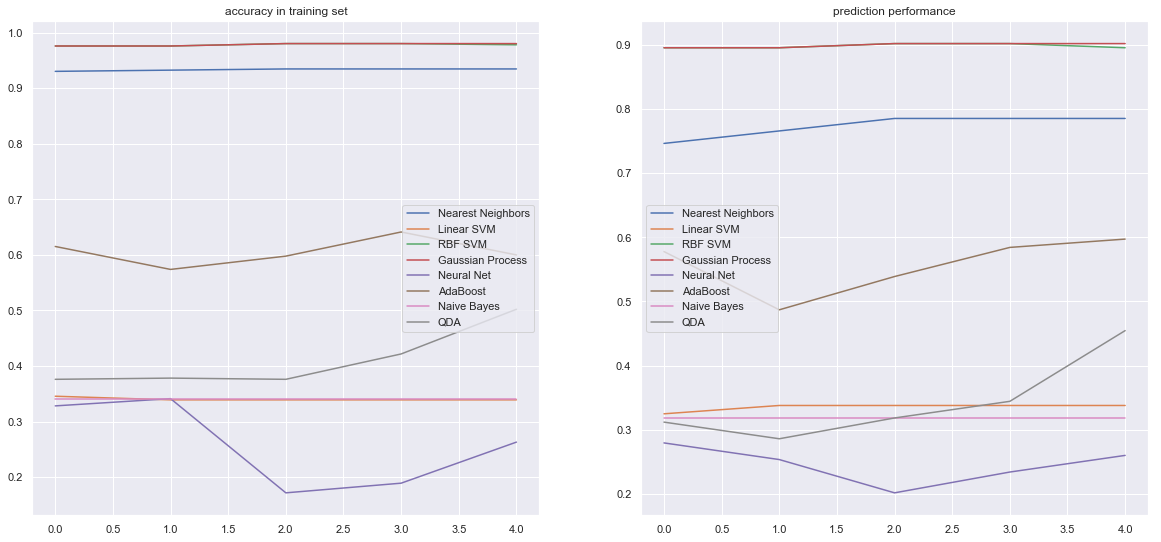

In [674]:
f,ax=plt.subplots(1,2,figsize=(20,20))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
i=0
for key in bias_.keys():
    plt.subplot(221)
    ax1=plt.plot(bias_[key],label=key)
    plt.title('accuracy in training set')
    plt.legend(loc=7)
    plt.subplot(222)
    ax2=plt.plot(variance_[key],label=key)
    plt.title('prediction performance')
    #sns.lineplot(x=['1','2','3','4','5'],y=variance_[key],palette=flatui)
    #sns.pairplot(variance_[key],label='variance')
    plt.legend()
    

**Prediction**

In [675]:
X.columns

Index(['Budget', 'ReleaseInfo', 'Runtime', 'Genre_Action', 'Genre_Adventure',
       'Genre_Animation', 'Genre_Biography', 'Genre_Comedy', 'Genre_Crime',
       'Genre_Documentary', 'Genre_Drama', 'Genre_Family', 'Genre_Fantasy',
       'Genre_History', 'Genre_Horror', 'Genre_Music', 'Genre_Musical',
       'Genre_Mystery', 'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Short',
       'Genre_Sport', 'Genre_Thriller', 'Genre_War', 'Genre_Western',
       'IssueDataOfGoldenWeek_1', 'IssueDataOfGoldenWeek_2',
       'IssueDataOfGoldenWeek_3', 'IssueDataOfGoldenWeek_4',
       'IssueDataOfGoldenWeek_5', 'Country_Australia', 'Country_China',
       'Country_France', 'Country_Germany', 'Country_Hong', 'Country_India',
       'Country_Japan', 'Country_New', 'Country_Poland', 'Country_South',
       'Country_Spain', 'Country_Taiwan', 'Country_Thailand', 'Country_UK',
       'Country_USA'],
      dtype='object')

In [729]:
X_new=np.array([[200000000*0.15,2,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]
              ,[200000000*0.15,2,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]
              ,[200000000*0.15,2,100,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]
              ,[200000000*0.15,2,100,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]
              ,])

**fitting model**

In [810]:
pca_pred=PCA(n_components=4,)
data_=data_fit.drop(labels=['log_gross','GoldRelease_0','GoldRelease_1','gross_class'],axis=1)
data_= pca_pred.fit_transform(data_)
X_new_pca=pca_pred.transform(X_new)

**prediction by Gaussian Process**

In [811]:
y_final=data_fit.gross_class
clf=GaussianProcessClassifier(1.0 * RBF(1.0))
clf.fit(data_, np.array(y_final).reshape(-1,1))
bias_final=clf.score(data_,np.array(y_final).reshape(-1,1))
y_pred=clf.predict(X_new_pca)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [812]:
y_pred

array([2, 2, 2, 2])

In [813]:
bias_final

0.9820846905537459

In [814]:
bins=pd.qcut(data.log_gross,
                     q=[0,0.25,0.5,0.75,1],
                    labels=[1,2,3,4],
                    retbins=True)

In [815]:
bins[1]

array([14.81654677, 16.88474651, 17.8721855 , 18.5353505 , 20.17135638])

In [816]:
np.exp(16.88474651)

21525449.914266534

In [817]:
np.exp(17.8721855)

57781863.26156561

In [875]:
np.exp(20.17135638)

575849200.6751523

**prediction by SVM**

In [818]:
svc_rbf=SVC(gamma=2, C=1,max_iter=1000)
svc_rbf.fit(data_, np.array(y_final).reshape(-1,1))
bias_final=svc_rbf.score(data_,np.array(y_final).reshape(-1,1))
y_pred=svc_rbf.predict(X_new_pca)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [819]:
y_pred

array([4, 4, 4, 4])

In [820]:
bias_final

0.9820846905537459

**prediction by KNN**

In [832]:
KNN=KNeighborsClassifier(3)
KNN.fit(data_, np.array(y_final).reshape(-1,1))
bias_final=KNN.score(data_,np.array(y_final).reshape(-1,1))
y_pred=KNN.predict(X_new_pca)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [833]:
y_pred

array([2, 2, 2, 2])

In [834]:
bias_final

0.9560260586319218